###### In this project, we intend to develop a model to make predictions for the number of prisoners we have based on the factors like burglary, larceny, man\_slaughter, etc. depending on how many null values these columns have. Further in the next few cells in this training file, we will show up what visualizations we create to understand the factors we need to be taken into consideration.



## Imports



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.expres
s as px


## Data Information and Cleaning



In [36]:
crime_df = pd.read_csv("crimes.csv")

In [37]:
crime_df.dropna(inplace=True)

# crime_df.reset_index(drop=True, inplace=True)

In [38]:
crime_df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
613,ALABAMA,False,2013,26825,False,False,4833996.0,20834.0,346.0,1449.0,2055.0,4645.0,13788.0,161835.0,42410.0,108862.0,10563.0
614,ALASKA,True,2013,5081,False,False,737259.0,4709.0,34.0,657.0,925.0,623.0,3127.0,21211.0,2917.0,16599.0,1695.0
615,ARIZONA,False,2013,41031,False,False,6634997.0,27576.0,355.0,2344.0,3174.0,6656.0,17391.0,223294.0,48292.0,158036.0,16966.0
616,ARKANSAS,False,2013,14295,False,False,2958765.0,13705.0,158.0,1135.0,1490.0,2261.0,9796.0,106477.0,30369.0,70430.0,5678.0
617,CALIFORNIA,False,2013,134339,False,False,38431393.0,154739.0,1746.0,7464.0,10324.0,53640.0,89029.0,1018907.0,232058.0,621557.0,165292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,VIRGINIA,False,2015,30430,False,False,8382993.0,16399.0,383.0,1493.0,2340.0,4441.0,9235.0,156470.0,21340.0,127019.0,8111.0
761,WASHINGTON,False,2015,17222,False,False,7170351.0,20394.0,211.0,2193.0,2705.0,5449.0,12029.0,248369.0,50993.0,170509.0,26867.0
762,WEST VIRGINIA,False,2015,5925,False,False,1844128.0,6231.0,70.0,420.0,672.0,760.0,4729.0,37251.0,9170.0,25842.0,2239.0
763,WISCONSIN,False,2015,22914,False,False,5771337.0,17647.0,240.0,1224.0,1780.0,5232.0,10395.0,113924.0,19554.0,83385.0,10985.0


In [39]:
# Check for null values and remove null values from columns
crime_df.isnull().sum()

jurisdiction              0
includes_jails            0
year                      0
prisoner_count            0
crime_reporting_change    0
crimes_estimated          0
state_population          0
violent_crime_total       0
murder_manslaughter       0
rape_legacy               0
rape_revised              0
robbery                   0
agg_assault               0
property_crime_total      0
burglary                  0
larceny                   0
vehicle_theft             0
dtype: int64

In [40]:
# dropping columns which have maximum null values of the whole data
#rape_legacy, vehicle_theft, larceny, robbery

In [41]:
# drop any remaining null values in rows
crime_df = crime_df.drop('rape_legacy', axis = 1)
crime_df = crime_df.drop('larceny', axis = 1) 
crime_df = crime_df.drop('robbery', axis = 1)
crime_df = crime_df.drop('vehicle_theft', axis = 1)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 613 to 764
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            149 non-null    object 
 1   includes_jails          149 non-null    bool   
 2   year                    149 non-null    int64  
 3   prisoner_count          149 non-null    int64  
 4   crime_reporting_change  149 non-null    object 
 5   crimes_estimated        149 non-null    object 
 6   state_population        149 non-null    float64
 7   violent_crime_total     149 non-null    float64
 8   murder_manslaughter     149 non-null    float64
 9   rape_revised            149 non-null    float64
 10  agg_assault             149 non-null    float64
 11  property_crime_total    149 non-null    float64
 12  burglary                149 non-null    float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 15.3+ KB


In [42]:
# checking for null values in the each column of the dataset
crime_df.isnull().sum()

jurisdiction              0
includes_jails            0
year                      0
prisoner_count            0
crime_reporting_change    0
crimes_estimated          0
state_population          0
violent_crime_total       0
murder_manslaughter       0
rape_revised              0
agg_assault               0
property_crime_total      0
burglary                  0
dtype: int64

## Data Visualisation



In [49]:
# Plot 1: Prisoner Count per state

fig = px.line(crime_df, x='jurisdiction', y='prisoner_count', color = 'year')
fig.show()

In [56]:
# Plot 2: Murder-Manslaughter per state

fig = px.bar(crime_df, x='jurisdiction', y='murder_manslaughter', color = 'year', title = "Murder-Manslaughter per State", labels = {"jurisdiction":"States", "murder_manslaughter":"Murder-Manslaughter"})
fig.show()

In [55]:
# Plot 3: Burglary per state

fig = px.scatter(crime_df, x ='jurisdiction', y = 'burglary', color='prisoner_count', title = "Burglary per State", labels = {"jurisdiction":"States", "burglary":"Burglary"})
fig.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

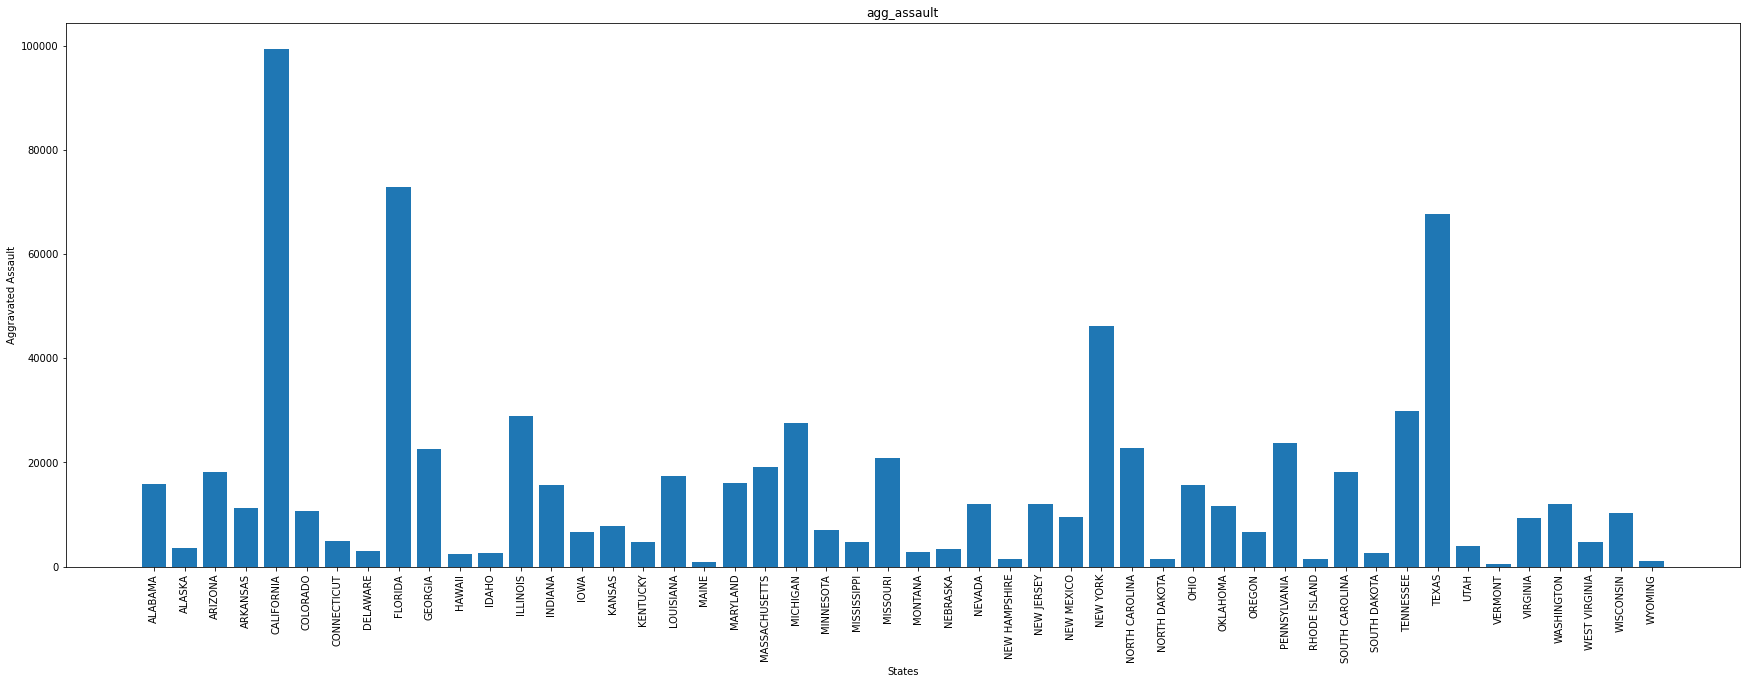

In [15]:
# Plot 4: Assault per state

plt.figure(figsize=(30, 10))
plt.bar(crime_df['jurisdiction'], crime_df['agg_assault'])
plt.title('agg_assault')
plt.ylabel("Aggravated Assault")
plt.xlabel("States")
plt.xticks(rotation = 90)

In [81]:
# Plot 5: Includes jail or not based on the crimes

path=['murder_manslaughter','rape_revised','agg_assault','burglary']
fig = px.bar(crime_df, x="jurisdiction", y=path, hover_data = ["includes_jails","year"], title="Includes jail or not based on the crimes")
fig.show()

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

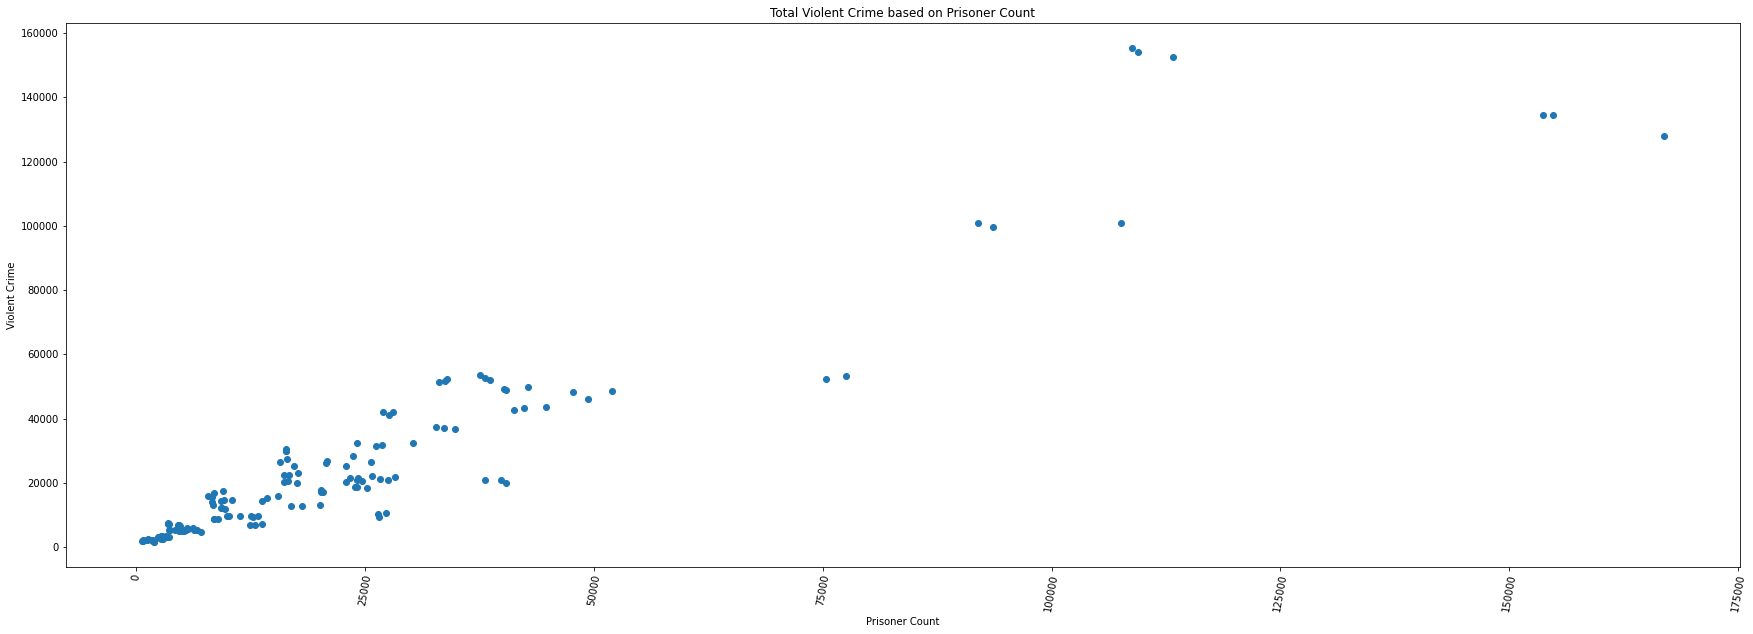

In [17]:
# Plot 6: Total Violent Crime based on the prisoner count
plt.figure(figsize=(30, 10))
plt.scatter(crime_df['violent_crime_total'], crime_df['prisoner_count'])
plt.title('Total Violent Crime based on Prisoner Count')
plt.ylabel("Violent Crime")
plt.xlabel("Prisoner Count")
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Amount of Prisoners per State')

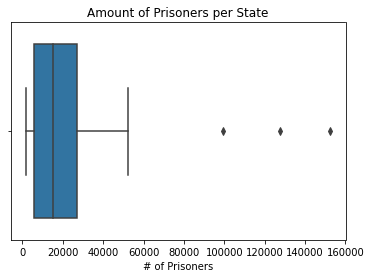

In [18]:
# Plot 7: Amount of prisoners per state

sns.boxplot(x="prisoner_count", data=crime_df.tail(50))
plt.xlabel("# of Prisoners")
plt.title("Amount of Prisoners per State")

Data Analysis for the above plot:



#### Correlation Plot



Text(0.5, 1.0, 'Correlation Plot')

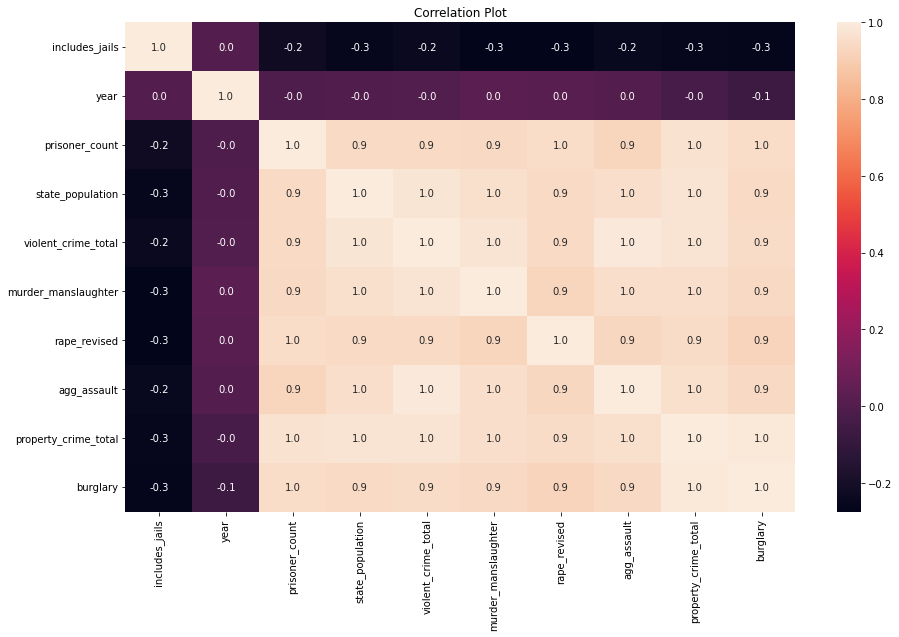

In [85]:
plt.figure(figsize = (15,9))
ax = plt.subplot()
sns.heatmap(crime_df.corr(),annot=True, fmt='.1f', ax=ax)
ax.set_title('Correlation Plot')

## Feature Selection & Extraction



## Models



In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, accuracy_score

from sklearn.metrics import confusion_matrix
crime_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,agg_assault,property_crime_total,burglary
613,ALABAMA,False,2013,26825,False,False,4833996.0,20834.0,346.0,2055.0,13788.0,161835.0,42410.0
614,ALASKA,True,2013,5081,False,False,737259.0,4709.0,34.0,925.0,3127.0,21211.0,2917.0
615,ARIZONA,False,2013,41031,False,False,6634997.0,27576.0,355.0,3174.0,17391.0,223294.0,48292.0
616,ARKANSAS,False,2013,14295,False,False,2958765.0,13705.0,158.0,1490.0,9796.0,106477.0,30369.0
617,CALIFORNIA,False,2013,134339,False,False,38431393.0,154739.0,1746.0,10324.0,89029.0,1018907.0,232058.0


#### Label Encoding



In [21]:
labelencoder = LabelEncoder()
crime_df['jurisdiction Labels'] = labelencoder.fit_transform(crime_df["jurisdiction"])
crime_df['includes_jails Labels'] = labelencoder.fit_transform(crime_df["includes_jails"])
crime_df['jurisdiction'] = crime_df['jurisdiction Labels']
crime_df['includes_jails'] = crime_df['includes_jails Labels']
crime_df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_revised,agg_assault,property_crime_total,burglary,jurisdiction Labels,includes_jails Labels
613,0,0,2013,26825,False,False,4833996.0,20834.0,346.0,2055.0,13788.0,161835.0,42410.0,0,0
614,1,1,2013,5081,False,False,737259.0,4709.0,34.0,925.0,3127.0,21211.0,2917.0,1,1
615,2,0,2013,41031,False,False,6634997.0,27576.0,355.0,3174.0,17391.0,223294.0,48292.0,2,0
616,3,0,2013,14295,False,False,2958765.0,13705.0,158.0,1490.0,9796.0,106477.0,30369.0,3,0
617,4,0,2013,134339,False,False,38431393.0,154739.0,1746.0,10324.0,89029.0,1018907.0,232058.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,45,0,2015,30430,False,False,8382993.0,16399.0,383.0,2340.0,9235.0,156470.0,21340.0,45,0
761,46,0,2015,17222,False,False,7170351.0,20394.0,211.0,2705.0,12029.0,248369.0,50993.0,46,0
762,47,0,2015,5925,False,False,1844128.0,6231.0,70.0,672.0,4729.0,37251.0,9170.0,47,0
763,48,0,2015,22914,False,False,5771337.0,17647.0,240.0,1780.0,10395.0,113924.0,19554.0,48,0


In [22]:
training_features = ['jurisdiction','includes_jails','state_population','violent_crime_total','murder_manslaughter','rape_revised','agg_assault','property_crime_total','burglary']
target = 'prisoner_count'

In [23]:
#new_cdf = jurisdiction, includes_jail, state_population, violent_crime_total, rape_revised, murder_manslaughter, agg_assault, property_crime_total, burglary 
train, test = train_test_split(crime_df, test_size=0.2, shuffle=True)
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
print(train_X.shape)
train_X

(119, 9)


,jurisdiction,includes_jails,state_population,violent_crime_total,murder_manslaughter,rape_revised,agg_assault,property_crime_total,burglary
633,20,0,6708874.0,27264.0,138.0,2303.0,18118.0,137274.0,30716.0
701,37,0,12787209.0,40164.0,614.0,3827.0,22189.0,247016.0,45720.0
652,39,0,4771929.0,24263.0,305.0,2233.0,17760.0,173261.0,40930.0
713,49,0,584153.0,1142.0,16.0,174.0,899.0,11477.0,1689.0
729,14,0,3123899.0,8936.0,72.0,1156.0,6661.0,63957.0,14892.0
...,...,...,...,...,...,...,...,...,...
646,33,0,723857.0,1979.0,16.0,355.0,1447.0,15356.0,2979.0
669,5,0,5355866.0,16554.0,151.0,3039.0,10325.0,135510.0,23472.0
672,8,0,19893297.0,107521.0,1149.0,8563.0,72895.0,679446.0,143220.0
752,37,0,12802503.0,40339.0,658.0,4305.0,22373.0,232085.0,39664.0


#### Linear Model



In [24]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [25]:
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

print(mean_absolute_error(np.array(test_Y), test_pred_Y))

5227.66901933673


In [26]:
result = model.score(test_X, test_Y)
result

0.944597693967246

#### Random Forest Regressor



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 5000, max_depth = 8)
regressor_rf.fit(train_X, train_Y) 

RandomForestRegressor(max_depth=8, n_estimators=5000)

In [28]:
random_result = regressor_rf.predict(test_X)
print(mean_absolute_error(np.array(test_Y), random_result))

resultrf = regressor_rf.score(test_X, test_Y)
print("Accuracy: ", resultrf)

2945.4966696745064


Accuracy:  0.9775712248847894


#### Decision Tree Regressor



In [29]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
regressor_dt = DecisionTreeRegressor(random_state = 0) 
regressor_dt.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=0)

In [30]:
decision_result = regressor_dt.predict(test_X)
print(mean_absolute_error(np.array(test_Y), decision_result))

resultdt = regressor_dt.score(test_X, test_Y)
print("Accuracy: ",resultdt)

983.3666666666667
Accuracy:  0.99728060766884


In [31]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(train_X, train_Y)
result = regressor.predict(train_X)

##### SVM

